In [2]:
import os
from glob import glob

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_path = glob('mnist_png/training/0/*.png')
data_path[0]

'mnist_png/training/0\\1.png'

#### tensorflow로 불러오기

In [11]:
data_path = tf.io.matching_files('mnist_png/training/0/*.png')
data_path

<tf.Tensor: shape=(5923,), dtype=string, numpy=
array([b'mnist_png\\training\\0\\1.png',
       b'mnist_png\\training\\0\\1000.png',
       b'mnist_png\\training\\0\\10005.png', ...,
       b'mnist_png\\training\\0\\9985.png',
       b'mnist_png\\training\\0\\9986.png',
       b'mnist_png\\training\\0\\9994.png'], dtype=object)>

In [12]:
path = data_path[0]
path

<tf.Tensor: shape=(), dtype=string, numpy=b'mnist_png\\training\\0\\1.png'>

### load image

In [13]:
gfile = tf.io.read_file(path)

In [15]:
image = tf.io.decode_image(gfile)

In [17]:
image.shape

TensorShape([28, 28, 1])

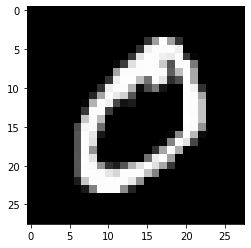

In [19]:
plt.imshow(image[:,:,0], 'gray')
plt.show()

### set data generator

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)

In [25]:
inputs = image[tf.newaxis,...]
inputs.shape

TensorShape([1, 28, 28, 1])

In [57]:
image = next(iter(datagen.flow(inputs)))
image.shape

(1, 28, 28, 1)

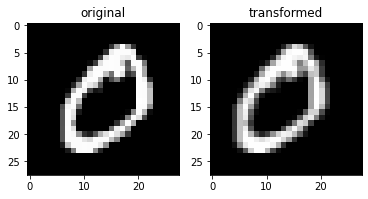

In [58]:
plt.subplot(121)
plt.title('original')
plt.imshow(np.squeeze(inputs),'gray')

plt.subplot(122)
plt.title('transformed')
plt.imshow(np.squeeze(image), 'gray')

### Transformation

- width_shift_range
- height_shift_range
- brightness_range
- zoom_range
- horizontal_flip
- vertical_flip
- rescale
- preprocessing_function

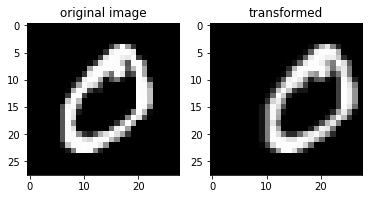

In [68]:
datagen = ImageDataGenerator(
    width_shift_range = 0.3
)

image = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('original image')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('transformed')
plt.imshow(np.squeeze(image), 'gray')
plt.show()

In [85]:
datagen = ImageDataGenerator(
   zoom_range = 0.3 #상하좌우 늘린다
   
)

image = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('original image')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('transformed')
plt.imshow(np.squeeze(image), 'gray')
plt.show()

SyntaxError: invalid syntax (<ipython-input-85-a3328bf4dd08>, line 3)

### rescale시 주의사항

In [86]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.7,
    rescale = 1./255.
)
test_datagen = ImageDataGenerator(
   
    rescale = 1./255.
)